### 전국 신용카드 승인금액

In [157]:
import pandas as pd

# csv파일 불러오기
df = pd.read_csv('./data/카드_전국.csv')
df

,날짜,전국_합계,전국_종합소매,전국_ 백화점,전국_ 대형마트/유통전문점,전국_ 슈퍼마켓,전국_ 편의점,전국_ 면세점,전국_전자상거래/통신판매,전국_식료품,...,전국_오락/문화,전국_ 스포츠/오락/여가,전국_ 서적/문구,전국_교육,전국_숙박/음식,전국_ 숙박,전국_ 음식점,전국_공과금/개인 및 전문 서비스,전국_금융/보험,전국_기타
0,2012/11,299970.34,53558.49,13695.10,26123.23,10604.38,1826.54,1309.25,29166.45,4778.33,...,13142.50,10450.19,2692.31,8644.69,33317.61,2119.99,31197.62,25205.61,10618.86,18468.27
1,2012/12,310533.02,57731.17,14542.45,28802.59,11308.05,1810.70,1267.38,29971.83,4895.34,...,12041.55,9030.65,3010.90,8440.60,37410.08,2454.51,34955.56,25947.67,10529.91,19655.81
2,2013/01,296732.27,51384.80,11189.07,25640.42,11435.88,1778.78,1340.65,28545.80,5024.76,...,10803.91,8001.41,2802.50,8776.78,34309.86,2458.03,31851.83,30498.42,10421.99,19792.28
3,2013/02,267365.92,48141.86,9748.40,25035.42,10602.32,1652.60,1103.11,24596.71,5510.28,...,9302.49,6800.21,2502.28,8431.41,28779.93,1821.75,26958.18,25149.57,9509.00,18103.45
4,2013/03,295640.18,49572.79,10873.94,24769.86,10904.74,1877.38,1146.88,26704.28,4775.35,...,12895.59,9214.35,3681.25,8996.41,34196.47,1898.21,32298.26,25570.21,10253.94,19820.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2021/12,539935.08,72991.73,16509.80,29238.11,17759.22,8968.91,515.68,132006.30,10014.39,...,12723.92,9748.01,2975.90,10762.54,47156.65,2732.84,44423.81,60242.33,24112.50,40410.91
110,2022/01,545394.92,76347.07,16044.01,31659.32,19422.93,8730.99,489.82,131621.64,12855.90,...,11337.65,8512.42,2825.23,11109.97,44354.54,2624.21,41730.34,72049.97,22435.69,39684.46
111,2022/02,470296.08,62651.29,12867.77,25751.48,15657.35,7927.86,446.83,119029.37,7986.69,...,10204.06,7841.77,2362.28,10193.33,36902.07,2436.82,34465.24,54784.83,21303.98,35973.76
112,2022/03,539346.45,71787.11,14932.79,28682.36,18116.34,9562.31,493.32,134751.97,8896.80,...,14276.81,10963.02,3313.79,11284.20,44099.97,2223.13,41876.84,59248.48,25145.71,40845.27


In [158]:
# 날짜 컬럼 "/" 제거
df["날짜"] = df["날짜"].str.replace("/", "")

In [159]:
# 날짜 컬럼 int 타입으로 변환
df["날짜"] = df["날짜"].astype(int)

In [160]:
df["날짜"] = pd.to_datetime(df["날짜"], format='%Y%m')
df["날짜"] = df["날짜"].dt.strftime('%Y-%m')
df.set_index('날짜')

,전국_합계,전국_종합소매,전국_ 백화점,전국_ 대형마트/유통전문점,전국_ 슈퍼마켓,전국_ 편의점,전국_ 면세점,전국_전자상거래/통신판매,전국_식료품,전국_ 일반식료품,...,전국_오락/문화,전국_ 스포츠/오락/여가,전국_ 서적/문구,전국_교육,전국_숙박/음식,전국_ 숙박,전국_ 음식점,전국_공과금/개인 및 전문 서비스,전국_금융/보험,전국_기타
날짜,,,,,,,,,,,,,,,,,,,,,
2012-11,299970.34,53558.49,13695.10,26123.23,10604.38,1826.54,1309.25,29166.45,4778.33,4171.52,...,13142.50,10450.19,2692.31,8644.69,33317.61,2119.99,31197.62,25205.61,10618.86,18468.27
2012-12,310533.02,57731.17,14542.45,28802.59,11308.05,1810.70,1267.38,29971.83,4895.34,4342.47,...,12041.55,9030.65,3010.90,8440.60,37410.08,2454.51,34955.56,25947.67,10529.91,19655.81
2013-01,296732.27,51384.80,11189.07,25640.42,11435.88,1778.78,1340.65,28545.80,5024.76,4400.68,...,10803.91,8001.41,2802.50,8776.78,34309.86,2458.03,31851.83,30498.42,10421.99,19792.28
2013-02,267365.92,48141.86,9748.40,25035.42,10602.32,1652.60,1103.11,24596.71,5510.28,4853.38,...,9302.49,6800.21,2502.28,8431.41,28779.93,1821.75,26958.18,25149.57,9509.00,18103.45
2013-03,295640.18,49572.79,10873.94,24769.86,10904.74,1877.38,1146.88,26704.28,4775.35,4113.91,...,12895.59,9214.35,3681.25,8996.41,34196.47,1898.21,32298.26,25570.21,10253.94,19820.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12,539935.08,72991.73,16509.80,29238.11,17759.22,8968.91,515.68,132006.30,10014.39,9388.27,...,12723.92,9748.01,2975.90,10762.54,47156.65,2732.84,44423.81,60242.33,24112.50,40410.91
2022-01,545394.92,76347.07,16044.01,31659.32,19422.93,8730.99,489.82,131621.64,12855.90,12006.56,...,11337.65,8512.42,2825.23,11109.97,44354.54,2624.21,41730.34,72049.97,22435.69,39684.46
2022-02,470296.08,62651.29,12867.77,25751.48,15657.35,7927.86,446.83,119029.37,7986.69,7510.97,...,10204.06,7841.77,2362.28,10193.33,36902.07,2436.82,34465.24,54784.83,21303.98,35973.76


In [161]:
df.columns = df.columns.str.replace('_ ','_')
df.columns

Index(['날짜', '전국_합계', '전국_종합소매', '전국_백화점', '전국_대형마트/유통전문점', '전국_슈퍼마켓',
       '전국_편의점', '전국_면세점', '전국_전자상거래/통신판매', '전국_식료품', '전국_일반식료품', '전국_건강보조식품',
       '전국_의류/잡화', '전국_의복/직물', '전국_복식잡화', '전국_시계/귀금속/안경', '전국_화장품', '전국_연료',
       '전국_가구/가전', '전국_가구', '전국_가전제품/정보통신기기', '전국_의료/보건', '전국_종합병원',
       '전국_일반병의원/기타의료기관', '전국_자동차', '전국_국산자동차신품', '전국_기타운송수단',
       '전국_자동차 부품 및 정비', '전국_여행/교통', '전국_여행사/자동차임대', '전국_항공사', '전국_대중교통',
       '전국_오락/문화', '전국_스포츠/오락/여가', '전국_서적/문구', '전국_교육', '전국_숙박/음식', '전국_숙박',
       '전국_음식점', '전국_공과금/개인 및 전문 서비스', '전국_금융/보험', '전국_기타'],
      dtype='object')

### 분류별 상품 나누기

In [162]:
# 상품 나누기
df_res = df[['날짜','전국_숙박/음식', '전국_숙박', '전국_음식점']]
df_shooping = df[['날짜', '전국_백화점', '전국_대형마트/유통전문점', '전국_슈퍼마켓', '전국_편의점']]
df_vechicle = df[['날짜', '전국_자동차', '전국_국산자동차신품', '전국_기타운송수단', '전국_자동차 부품 및 정비', '전국_연료']]
df_travel = df[['날짜','전국_면세점','전국_여행/교통','전국_여행사/자동차임대','전국_항공사','전국_대중교통','전국_오락/문화','전국_스포츠/오락/여가']]
df_retail = df[['날짜','전국_종합소매','전국_식료품','전국_일반식료품','전국_가구/가전','전국_가구','전국_가전제품/정보통신기기']]
df_fashion = df[['날짜','전국_의류/잡화','전국_의복/직물','전국_복식잡화','전국_시계/귀금속/안경','전국_화장품']]
df_online = df[['날짜','전국_전자상거래/통신판매']]
df_hospital = df[['날짜','전국_건강보조식품','전국_의료/보건','전국_종합병원','전국_일반병의원/기타의료기관']]
df_etc = df[['날짜','전국_서적/문구','전국_교육','전국_공과금/개인 및 전문 서비스','전국_금융/보험','전국_기타']]

In [163]:
# 등락률 구하기
df_res['전국_숙박/음식_등락률'] = df_res['전국_숙박/음식'].pct_change().round(2)
df_res['전국_숙박_등락률'] = df_res['전국_숙박'].pct_change().round(2)
df_res['전국_음식점_등락률'] = df_res['전국_음식점'].pct_change().round(2)
df_shooping['전국_백화점_등락률'] = df_shooping['전국_백화점'].pct_change().round(2)
df_shooping['전국_대형마트/유통전문점_등락률'] = df_shooping['전국_대형마트/유통전문점'].pct_change().round(2)
df_shooping['전국_슈퍼마켓_등락률'] = df_shooping['전국_슈퍼마켓'].pct_change().round(2)
df_shooping['전국_편의점_등락률'] = df_shooping['전국_편의점'].pct_change().round(2)
df_vechicle['전국_자동차_등락률'] = df_vechicle['전국_자동차'].pct_change().round(2)
df_vechicle['전국_국산자동차신품_등락률'] = df_vechicle['전국_국산자동차신품'].pct_change().round(2)
df_vechicle['전국_기타운송수단_등락률'] = df_vechicle['전국_기타운송수단'].pct_change().round(2)
df_vechicle['전국_자동차 부품 및 정비_등락률'] = df_vechicle['전국_자동차 부품 및 정비'].pct_change().round(2)
df_vechicle['전국_연료_등락률'] = df_vechicle['전국_연료'].pct_change().round(2)
df_travel['전국_면세점_등락률'] = df_travel['전국_면세점'].pct_change().round(2)
df_travel['전국_여행/교통_등락률'] = df_travel['전국_여행/교통'].pct_change().round(2)
df_travel['전국_여행사/자동차임대_등락률'] = df_travel['전국_여행사/자동차임대'].pct_change().round(2)
df_travel['전국_항공사_등락률'] = df_travel['전국_항공사'].pct_change().round(2)
df_travel['전국_대중교통_등락률'] = df_travel['전국_대중교통'].pct_change().round(2)
df_travel['전국_오락/문화_등락률'] = df_travel['전국_오락/문화'].pct_change().round(2)
df_travel['전국_스포츠/오락/여가_등락률'] = df_travel['전국_스포츠/오락/여가'].pct_change().round(2)
df_retail['전국_종합소매_등락률'] = df_retail['전국_종합소매'].pct_change().round(2)
df_retail['전국_식료품_등락률'] = df_retail['전국_식료품'].pct_change().round(2)
df_retail['전국_일반식료품_등락률'] = df_retail['전국_일반식료품'].pct_change().round(2)
df_retail['전국_가구/가전_등락률'] = df_retail['전국_가구/가전'].pct_change().round(2)
df_retail['전국_가구_등락률'] = df_retail['전국_가구'].pct_change().round(2)
df_retail['전국_가전제품/정보통신기기_등락률'] = df_retail['전국_가전제품/정보통신기기'].pct_change().round(2)
df_fashion['전국_의류/잡화_등락률'] = df_fashion['전국_의류/잡화'].pct_change().round(2)
df_fashion['전국_의복/직물_등락률'] = df_fashion['전국_의복/직물'].pct_change().round(2)
df_fashion['전국_복식잡화_등락률'] = df_fashion['전국_복식잡화'].pct_change().round(2)
df_fashion['전국_시계/귀금속/안경_등락률'] = df_fashion['전국_시계/귀금속/안경'].pct_change().round(2)
df_fashion['전국_화장품_등락률'] = df_fashion['전국_화장품'].pct_change().round(2)
df_online['전국_전자상거래/통신판매_등락률'] = df_online['전국_전자상거래/통신판매'].pct_change().round(2)
df_hospital['전국_건강보조식품_등락률'] = df_hospital['전국_건강보조식품'].pct_change().round(2)
df_hospital['전국_의료/보건_등락률'] = df_hospital['전국_의료/보건'].pct_change().round(2)
df_hospital['전국_종합병원_등락률'] = df_hospital['전국_종합병원'].pct_change().round(2)
df_hospital['전국_일반병의원/기타의료기관_등락률'] = df_hospital['전국_일반병의원/기타의료기관'].pct_change().round(2)
df_etc['전국_서적/문구_등락률'] = df_etc['전국_서적/문구'].pct_change().round(2)
df_etc['전국_교육_등락률'] = df_etc['전국_교육'].pct_change().round(2)
df_etc['전국_공과금/개인 및 전문 서비스_등락률'] = df_etc['전국_공과금/개인 및 전문 서비스'].pct_change().round(2)
df_etc['전국_금융/보험_등락률'] = df_etc['전국_금융/보험'].pct_change().round(2)
df_etc['전국_기타_등락률'] = df_etc['전국_기타'].pct_change().round(2)

C:\Users\82104\AppData\Local\Temp\ipykernel_21232\1347484113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['전국_숙박/음식_등락률'] = df_res['전국_숙박/음식'].pct_change().round(2)
C:\Users\82104\AppData\Local\Temp\ipykernel_21232\1347484113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['전국_숙박_등락률'] = df_res['전국_숙박'].pct_change().round(2)
C:\Users\82104\AppData\Local\Temp\ipykernel_21232\1347484113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [164]:
cpi_df = pd.read_csv('./csv/소비자물가지수_2020100__20220811151333.csv',encoding='cp949')
cpi_df

,시점,전국
0,2012.11,92.011
1,2012.12,92.175
2,2013.01,92.728
3,2013.02,93.038
4,2013.03,92.952
...,...,...
112,2022.03,106.060
113,2022.04,106.850
114,2022.05,107.560
115,2022.06,108.220


In [165]:
cpi_df["시점"] = cpi_df["시점"].astype(str)

# .10 이 .1로 변환된 걸 다시 재변환

cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"

C:\Users\82104\AppData\Local\Temp\ipykernel_21232\2535207010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"


In [166]:
cpi_df["시점"] = pd.to_datetime(cpi_df["시점"], format="%Y.%m")
cpi_df["시점"] = cpi_df["시점"].dt.strftime('%Y-%m')
cpi_df.rename(columns={"시점" : "날짜"}, inplace=True)
cpi_df.head()

,날짜,전국
0,2012-11,92.011
1,2012-12,92.175
2,2013-01,92.728
3,2013-02,93.038
4,2013-03,92.952


In [167]:
cpi_df['cpi_등락률'] = cpi_df['전국'].pct_change().round(2)
cpi_df.head()

,날짜,전국,cpi_등락률
0,2012-11,92.011,NaN
1,2012-12,92.175,0.00
2,2013-01,92.728,0.01
3,2013-02,93.038,0.00
4,2013-03,92.952,-0.00


In [168]:
interest_rates_df = pd.read_csv('./csv/시장금리.csv')
interest_rates_df

,날짜,국고채_3년_평균,국고채_5년_평균,국고채_10년_평균,회사채_3년_평균,CD_91몰_평균,콜금리_1일몰_평균,기준금리
0,2012-11,2.80,2.87,2.99,3.32,2.85,2.75,2.75
1,2012-12,2.85,2.98,3.13,3.30,2.88,2.75,2.75
2,2013-01,2.75,2.86,3.05,3.20,2.86,2.76,2.75
3,2013-02,2.70,2.83,3.04,3.06,2.83,2.75,2.75
4,2013-03,2.60,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...,...
109,2021-12,1.80,1.98,2.19,2.41,1.27,1.01,1.00
110,2022-01,2.06,2.28,2.49,2.63,1.39,1.19,1.25
111,2022-02,2.29,2.50,2.69,2.87,1.50,1.22,1.25
112,2022-03,2.37,2.60,2.78,3.03,1.50,1.24,1.25


In [169]:
socell_df = pd.read_csv('./csv/소매판매지수_1211_2204.csv')
socell_df = socell_df[['날짜','불변_총지수','계절_총지수']]
socell_df['불변_총지수_등락률'] = socell_df['불변_총지수'].pct_change().round(2)
socell_df['계절_총지수_등락률'] = socell_df['계절_총지수'].pct_change().round(2)
socell_df

,날짜,불변_총지수,계절_총지수,불변_총지수_등락률,계절_총지수_등락률
0,2012-11,97.5,94.6,NaN,NaN
1,2012-12,99.8,95.0,0.02,0.00
2,2013-01,91.2,94.4,-0.09,-0.01
3,2013-02,86.8,94.4,-0.05,0.00
4,2013-03,93.6,93.9,0.08,-0.01
...,...,...,...,...,...
109,2021-12,127.2,123.2,0.02,0.02
110,2022-01,117.5,120.7,-0.08,-0.02
111,2022-02,107.9,120.7,-0.08,0.00
112,2022-03,122.0,119.9,0.13,-0.01


In [170]:
a = socell_df['불변_총지수']
b = socell_df['불변_총지수_등락률']

In [154]:
c = socell_df['계절_총지수']
d = socell_df['계절_총지수_등락률']

In [188]:
# 전국_건강지수
df_hospital_b = pd.concat([df_hospital,a],axis=1)
df_hospital_b1 = pd.concat([df_hospital,b],axis=1)
df_hospital_s = pd.concat([df_hospital,c],axis=1)
df_hospital_s1 = pd.concat([df_hospital,d],axis=1)

# 전국_교육/기타
df_etc_b = pd.concat([df_etc,a],axis=1)
df_etc_b1 = pd.concat([df_etc,b],axis=1)
df_etc_s = pd.concat([df_etc,c],axis=1)
df_etc_s1 = pd.concat([df_etc,d],axis=1)

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


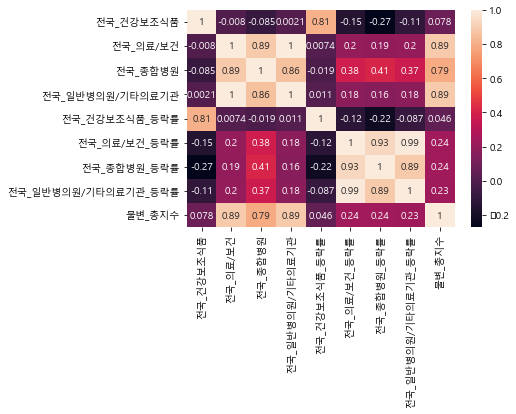

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
sns.heatmap(df_hospital_b.corr(),annot=True)

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


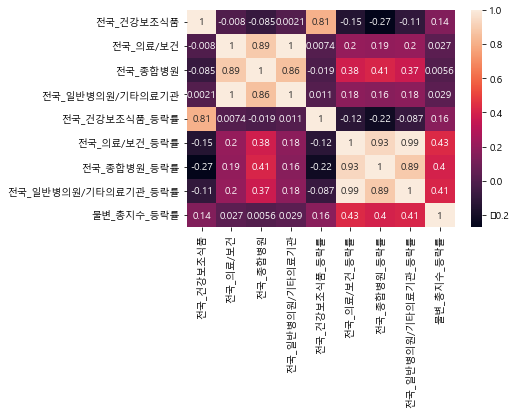

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
sns.heatmap(df_hospital_b1.corr(),annot=True)

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


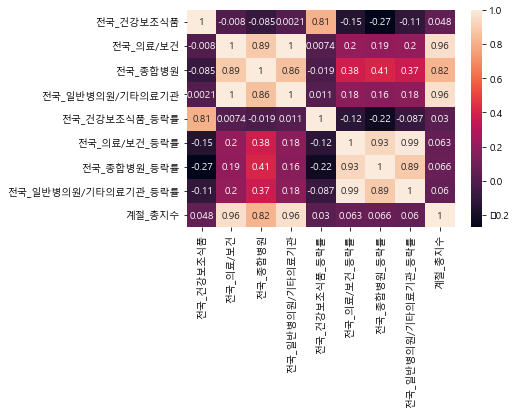

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
sns.heatmap(df_hospital_s.corr(),annot=True)

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


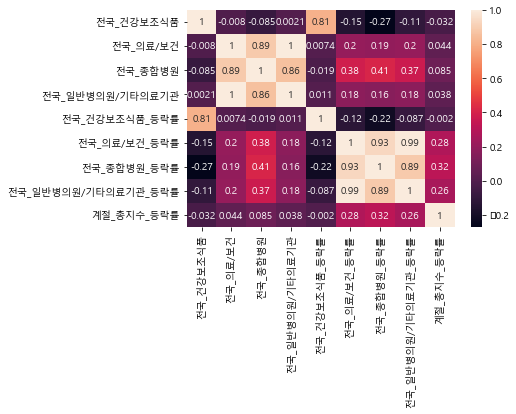

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
sns.heatmap(df_hospital_s1.corr(),annot=True)

<AxesSubplot:>

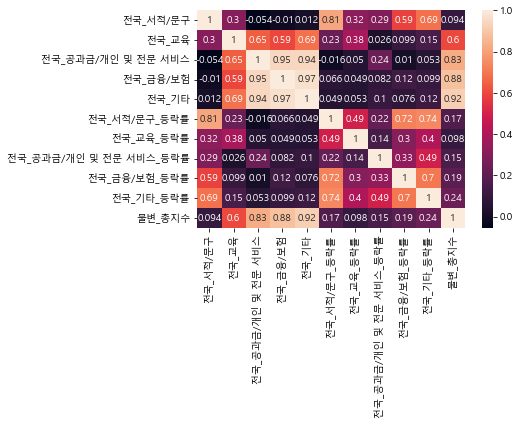

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
sns.heatmap(df_etc_b.corr(),annot=True)

<AxesSubplot:>

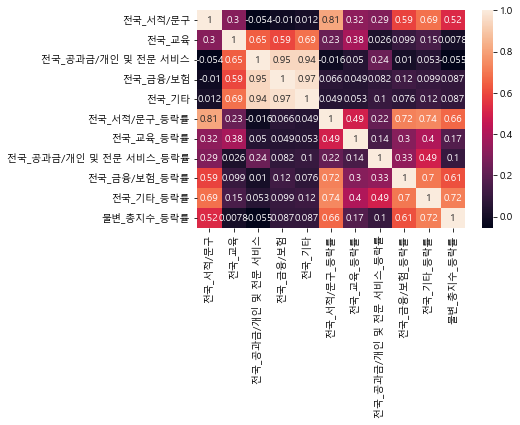

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
sns.heatmap(df_etc_b1.corr(),annot=True)

<AxesSubplot:>

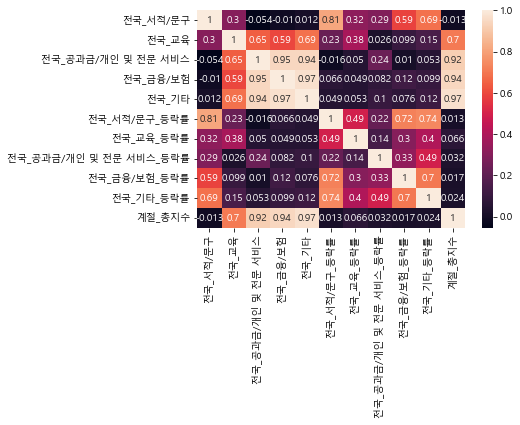

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
sns.heatmap(df_etc_s.corr(),annot=True)

<AxesSubplot:>

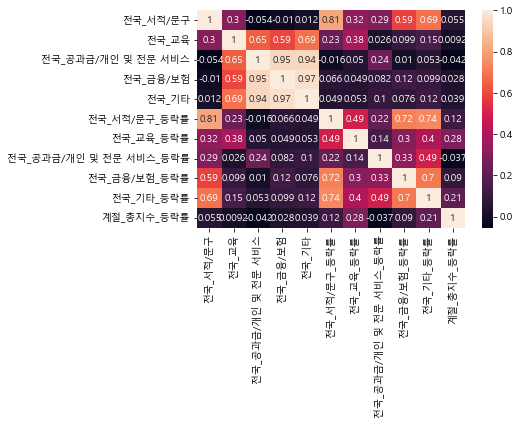

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
sns.heatmap(df_etc_s1.corr(),annot=True)

In [196]:
# 계절 나누는 함수
def seasons(s):
    if s.endswith("3") or s.endswith("4") or s.endswith("5"):
        return "봄"
    elif s.endswith("6") or s.endswith("7") or s.endswith("8"):
        return "여름"
    elif s.endswith("9") or s.endswith("10") or s.endswith("11"):
        return "가을"
    else:
        return "겨울"

In [197]:
# str 타입이 아니면 함수를 적용 못하기 때문에 데이터 타입 변경
df_hospital_b["날짜"] = df_hospital_b["날짜"].astype(str)

In [198]:
# 계절 컬럼에 년도 추가
df_hospital_b["계절"] = df_hospital_b["날짜"].str[:4] + " " + df_hospital_b["계절"]
df_hospital_b.head()

,날짜,전국_건강보조식품,전국_의료/보건,전국_종합병원,전국_일반병의원/기타의료기관,전국_건강보조식품_등락률,전국_의료/보건_등락률,전국_종합병원_등락률,전국_일반병의원/기타의료기관_등락률,불변_총지수,계절
0,2012-11,606.81,22958.88,5980.71,16978.17,NaN,NaN,NaN,NaN,97.5,2012 2012 2012 가을
1,2012-12,552.87,21824.52,5768.55,16055.96,-0.09,-0.05,-0.04,-0.05,99.8,2012 2012 2012 겨울
2,2013-01,624.08,24766.40,6535.50,18230.90,0.13,0.13,0.13,0.14,91.2,2013 2013 2013 겨울
3,2013-02,656.89,21469.13,5601.15,15867.98,0.05,-0.13,-0.14,-0.13,86.8,2013 2013 2013 겨울
4,2013-03,661.44,23354.47,6094.44,17260.03,0.01,0.09,0.09,0.09,93.6,2013 2013 2013 봄


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


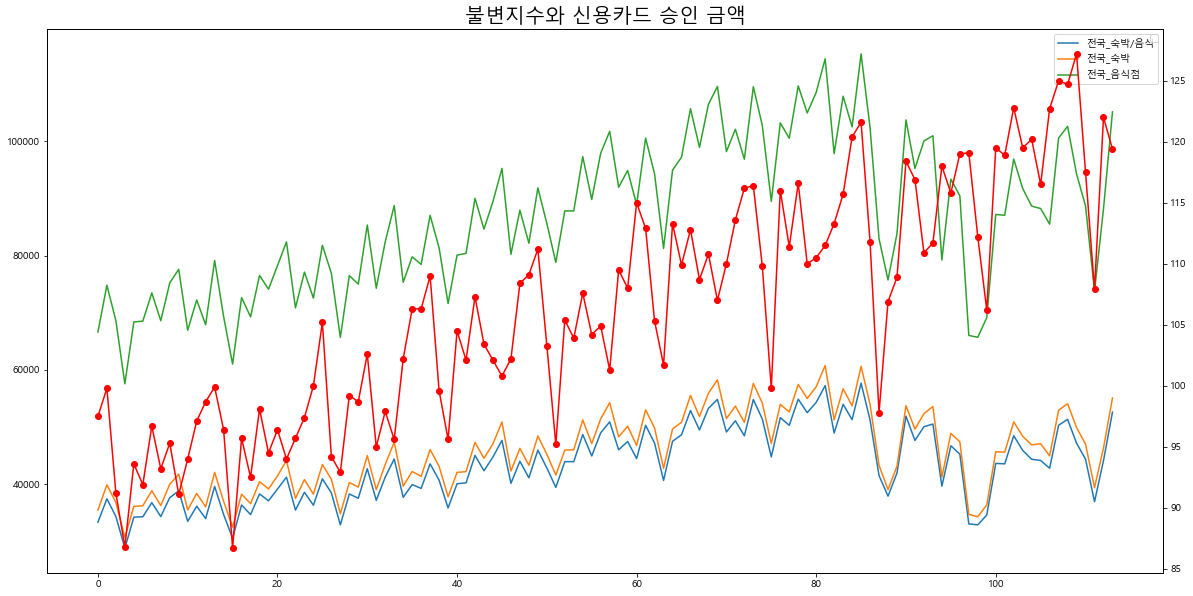

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "불변지수와 신용카드 승인 금액"
left_ax = r[['전국_숙박/음식', '전국_숙박', '전국_음식점']]
right_ax = r['불변_총지수']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'line', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='r',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


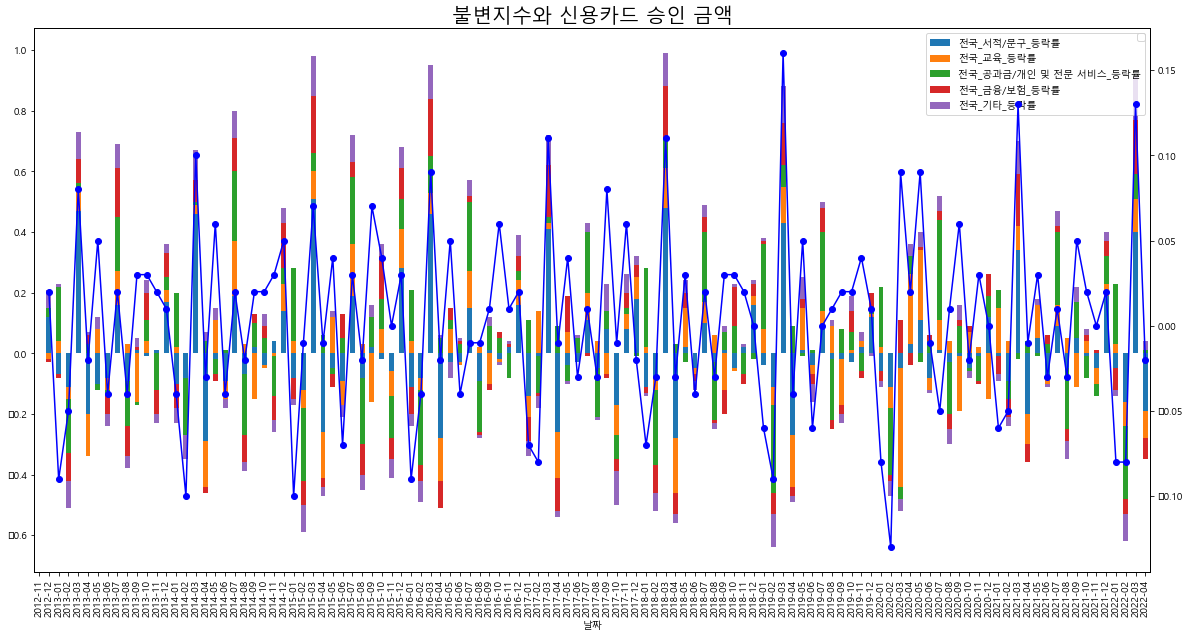

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "불변지수와 신용카드 승인 금액"
left_ax = c[['전국_서적/문구_등락률','전국_교육_등락률','전국_공과금/개인 및 전문 서비스_등락률','전국_금융/보험_등락률','전국_기타_등락률']]
right_ax = c['불변_총지수_등락률']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='b',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


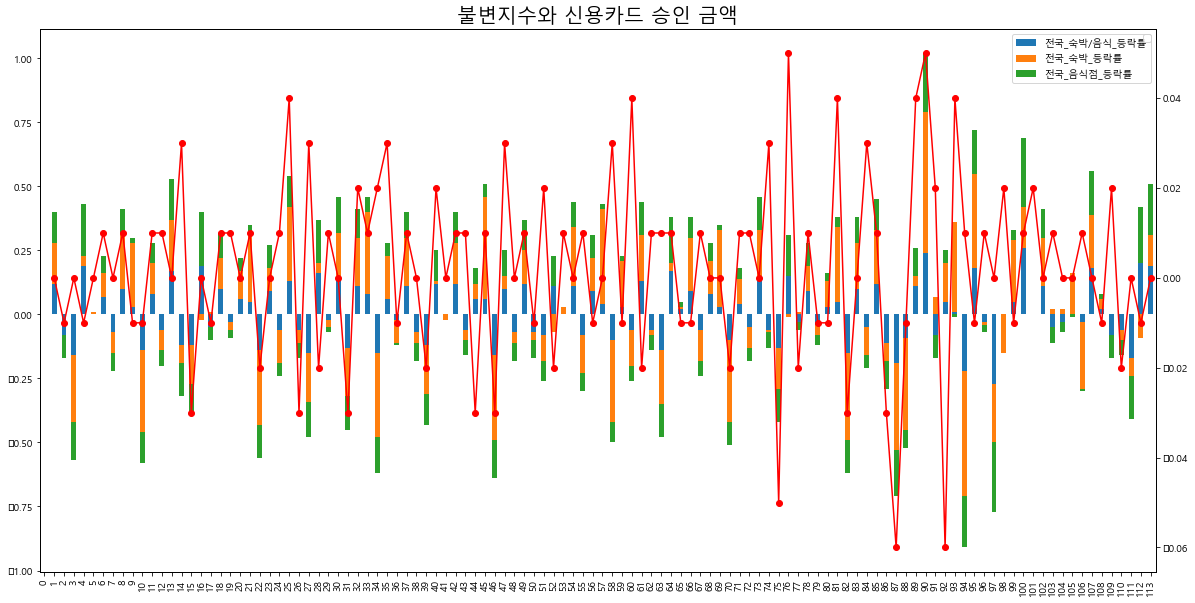

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####### 설정하기 ###
title = "불변지수와 신용카드 승인 금액"
left_ax = d[['전국_숙박/음식_등락률', '전국_숙박_등락률', '전국_음식점_등락률']]
right_ax = d['계절_총지수_등락률']



fig, ax0 = plt.subplots(figsize = (20, 10))
ax1 = ax0.twinx()
plt.rc('font', family='Malgun Gothic')              # 한글 깨짐 오류 수정

# 그래프 생성
left_ax.plot(kind = 'bar', stacked = True, ax = ax0,)
plt.legend(bbox_to_anchor=(1,1))
right_ax.plot(kind ='line', secondary_y = True, ax = ax1,color='r',marker = 'o')

plt.title(title, fontsize = 20)
plt.show()